#### **Tasks**

- Kolkata PowerPlay in 2020 and over the years
    - How has their powerplay scoring been overall and every match.
    - Make this a function so that seeing other teams ka scoring is also easy
- Stats of Hardik and Jadeja in death batting
    - strike rate and runs added from 16-20
- Bhuvneshwar and Bumrah in opening and death bowling respectively
- Kohli in opening
    - Strike rate, average



#### **Import Libraries**

In [ ]:
!pip install PyYAML

In [1]:
import yaml
import zipfile
import requests
from zipfile import ZipFile
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline


#### **Getting links for all cricket data**

In [2]:
#url of the source
main_url = 'https://cricsheet.org/'

#requesting website for data with BS4
page = requests.get(main_url)
soup = BeautifulSoup(page.content, 'html.parser')
tag_dt = soup.find_all('dt')

#storing required links and their wrapped text in a dictionary called data_url
data_url = dict()
for tag in tag_dt:
    temp_text = tag.a['href']
    match_type = tag.a.contents[0]
    link = 'https://cricsheet.org' + temp_text                                  #link of the match types
    key = temp_text.split('/')[2][:-4]                                          #abbreivated match_type stored as key
    
    #magical part of this cell :)
    data_url[key] = [link,match_type]

#printing the dictionary for reference
# for key in data_url:
    # print(key,':',data_url[key][1], data_url[key][0])

Key | Match Type | Link |
:--- |:--- | :---
**all**  |  All matches  |  https://cricsheet.org/downloads/all.zip
**tests** | Test matches | https://cricsheet.org/downloads/tests.zip
**mdms** | Multi-day matches | https://cricsheet.org/downloads/mdms.zip
**odis** | One-day internationals | https://cricsheet.org/downloads/odis.zip
**odms** | One-day matches | https://cricsheet.org/downloads/odms.zip
**t20s** | T20 internationals | https://cricsheet.org/downloads/t20s.zip
**it20s** | Non-official T20 internationals | https://cricsheet.org/downloads/it20s.zip
**bbl** | Big Bash League | https://cricsheet.org/downloads/bbl.zip
**ipl** | Indian Premier League | https://cricsheet.org/downloads/ipl.zip
**cpl** | Caribbean Premier League  |https://cricsheet.org/downloads/cpl.zip
**ntb** | T20 Blast | https://cricsheet.org/downloads/ntb.zip
**psl** | Pakistan Super League | https://cricsheet.org/downloads/psl.zip
**ssm** | Super Smash | https://cricsheet.org/downloads/ssm.zip
**wbb** | Women's Big Bash League | https://cricsheet.org/downloads/wbb.zip

#### **Requesting webpage for data**
##### **The mini Prestige**

In [3]:
#enclose the below in a function to get matches for all formats

#type of cricket info required to extract

#The Pledge
#Take something like IPL, ODIs, etc.
type_cric = 'ipl'

#The Turn
#You do something extraordinary out of it like get zip files out of the word
r = requests.get(data_url[type_cric][0])

with open('./'+ type_cric + '.zip','wb') as zip:
    zip.write(r.content)

with ZipFile('./'+ type_cric + '.zip', 'r') as zipObj:
    listOfFileNames = zipObj.namelist()

    for fileName in listOfFileNames:
        if fileName.endswith('.yaml'):
            zipObj.extract(fileName, './' + type_cric + '_files')
        if fileName.endswith('.txt'):
            zipObj.extract(fileName, './')

files_list = list()

with open('./README.txt', 'r') as readme:
    for line in readme:
        if line[0] == '2':
            readme_list = line.split('-')
            readme_list = [x.strip(' ') for x in readme_list]
            readme_list = [x.strip('\n') for x in readme_list]
            files_list.append(str(readme_list[6]))

print(len(files_list))

#The Prestige
#Change the name of the files (their apperance in this case) to something meaningful
count = 1
for i in range(len(files_list) - 1, -1, -1):
    # print(files_list[i])
    # code to assign matchid filename to the yaml files
    for filename in enumerate(os.listdir('./' + type_cric + '_files')):
        new_name = filename[1][:-5]
        if new_name == files_list[i]:
            dst = type_cric + str(format(count, '04d')) + ".yaml"
            src = './' + type_cric + '_files/' + filename[1]
            dst = './' + type_cric + '_files/' + dst

            # rename() function will
            # rename all the files
            os.rename(src, dst)
    count += 1

828


In [ ]:
!ls

ipl_files  ipl.zip  README.txt	sample_data


In [ ]:
!rm -rf ipl.zip

In [ ]:
with open('README.txt','r') as f:
    print(f.read())

#### **DataFrame Initialization**

In [4]:
#columns
meta_columns = ['key_id','data_version','created','revision']
toss_columns = ['key_id','toss_winner','toss_decision']
team_columns = ['key_id','team']
umpires_columns = ['key_id','umpires']
info_columns = ['key_id', 'city', 'competition', 'date', 'gender', 'match_type', 
                'match_type_number', 'neutral_venue', 'overs', 'player_of_match', 
                'venue']
dates_columns = ['key_id','date']
outcome_columns = ['key_id','by_innings','by_type','by_margin','bowl_out',
                   'eliminator','method','result','winner']
pom_columns = ['key_id','player_of_match']
bowl_out_columns = ['key_id','bowler','outcome']
supersub_columns = ['key_id','team','player']

innings_columns = ['key_id','innings_no','team', 'ball', 'batsman', 'bowler', 
                   'non_striker', 'runs_batsman', 'runs_extras', 'runs_non_boundary', 
                   'runs_total', 'wicket_fielder', 'wicket_kind', 'wicket_player_out', 
                   'extras_type', 'extras_run']

#checking if path exists or not
if not os.path.exists(type_cric + '_data'):
    os.makedirs(type_cric+'_data')

#initializing meta_df
if not 'meta_df.csv' in os.listdir(type_cric+'_data'):
    meta_df = pd.DataFrame(columns=meta_columns)
    meta_df.to_csv('./'+type_cric+'_data/meta_df.csv')                              #remove this later
else:
    meta_df = pd.read_csv('./'+type_cric+'_data/meta_df.csv')

#initializing toss_df
if not 'toss_df.csv' in os.listdir(type_cric+'_data'):
    toss_df = pd.DataFrame(columns=toss_columns)
    toss_df.to_csv('./'+type_cric+'_data/toss_df.csv')                              #remove this later
else:
    toss_df = pd.read_csv('./'+type_cric+'_data/toss_df.csv')

#initializing team_df
if not 'team_df.csv' in os.listdir(type_cric+'_data'):
    team_df = pd.DataFrame(columns=team_columns)
    team_df.to_csv('./'+type_cric+'_data/team_df.csv')                              #remove this later
else:
    team_df = pd.read_csv('./'+type_cric+'_data/team_df.csv')

#initializing umpires_df
if not 'umpires_df.csv' in os.listdir(type_cric+'_data'):
    umpires_df = pd.DataFrame(columns=umpires_columns)
    umpires_df.to_csv('./'+type_cric+'_data/umpires_df.csv')                              #remove this later
else:
    umpires_df = pd.read_csv('./'+type_cric+'_data/umpires_df.csv')

#initializing info_df
if not 'info_df.csv' in os.listdir(type_cric+'_data'):
    info_df = pd.DataFrame(columns=info_columns)
    info_df.to_csv('./'+type_cric+'_data/info_df.csv')                              #remove this later
else:
    info_df = pd.read_csv('./'+type_cric+'_data/info_df.csv')

#initializing meta_df
if not 'dates_df.csv' in os.listdir(type_cric+'_data'):
    dates_df = pd.DataFrame(columns=dates_columns)
    dates_df.to_csv('./'+type_cric+'_data/dates_df.csv')                              #remove this later
else:
    dates_df = pd.read_csv('./'+type_cric+'_data/dates_df.csv')

#initializing meta_df
if not 'outcome_df.csv' in os.listdir(type_cric+'_data'):
    outcome_df = pd.DataFrame(columns=outcome_columns)
    outcome_df.to_csv('./'+type_cric+'_data/outcome_df.csv')                              #remove this later
else:
    outcome_df = pd.read_csv('./'+type_cric+'_data/outcome_df.csv')

#initializing pom_df
if not 'pom_df.csv' in os.listdir(type_cric+'_data'):
    pom_df = pd.DataFrame(columns=pom_columns)
    pom_df.to_csv('./'+type_cric+'_data/pom_df.csv')                              #remove this later
else:
    pom_df = pd.read_csv('./'+type_cric+'_data/pom_df.csv')

#initializing bowl_out_df
# if not 'bowl_out_df.csv' in os.listdir(type_cric+'_data'):
bowl_out_df = pd.DataFrame(columns=bowl_out_columns)
    # bowl_out_df.to_csv('./'+type_cric+'_data/bowl_out_df.csv')                              #remove this later
# else:
    # bowl_out_df = pd.read_csv('./'+type_cric+'_data/bowl_out_df.csv')

#initializing supersub_df
if not 'supersub_df.csv' in os.listdir(type_cric+'_data'):
    supersub_df = pd.DataFrame(columns=supersub_columns)
    supersub_df.to_csv('./'+type_cric+'_data/supersub_df.csv')                              #remove this later
else:
    supersub_df = pd.read_csv('./'+type_cric+'_data/supersub_df.csv')

#initializing innings_df
if not 'innings_df.csv' in os.listdir(type_cric+'_data'):
    innings_df = pd.DataFrame(columns=innings_columns)
    innings_df.to_csv('./'+type_cric+'_data/innings_df.csv')                              #remove this later
else:
    innings_df = pd.read_csv('./'+type_cric+'_data/innings_df.csv')

# innings_df = pd.DataFrame()
# #appending dictionary to the column = mindblown
# meta_df.head()

In [35]:
if not 'innings_df.csv' in os.listdir(type_cric+'_data'):
    innings_df = pd.DataFrame(columns=innings_columns)
    innings_df.to_csv('./'+type_cric+'_data/innings_df.csv')                              #remove this later
else:
    innings_df = pd.read_csv('./'+type_cric+'_data/innings_df.csv')

In [5]:
innings_df.tail()

,key_id,innings_no,team,ball,batsman,bowler,non_striker,runs_batsman,runs_extras,runs_non_boundary,runs_total,wicket_fielder,wicket_kind,wicket_player_out,extras_type,extras_run,extras_runs
196059,ipl0826,2,Kolkata Knight Riders,19.2,CV Varun,HV Patel,Harbhajan Singh,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
196060,ipl0826,2,Kolkata Knight Riders,19.3,CV Varun,HV Patel,Harbhajan Singh,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
196061,ipl0826,2,Kolkata Knight Riders,19.4,Harbhajan Singh,HV Patel,CV Varun,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
196062,ipl0826,2,Kolkata Knight Riders,19.5,CV Varun,HV Patel,Harbhajan Singh,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
196063,ipl0826,2,Kolkata Knight Riders,19.6,Harbhajan Singh,HV Patel,CV Varun,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
for filename in os.listdir('ipl_files'):
    with open('./ipl_files/'+filename) as file:
        cric_dict = yaml.load(file)
    cric_dict['meta']['key_id'] = filename[:-5]
    meta_df = meta_df.append(cric_dict['meta'],ignore_index=True)
meta_df = meta_df.drop_duplicates()
meta_df = meta_df.reset_index(drop=True)

CPU times: user 4min 8s, sys: 371 ms, total: 4min 8s
Wall time: 4min 8s


#### **Using a For Loop**
    CPU times: user 3min 51s, sys: 189 ms, total: 3min 51s
    Wall time: 3min 51s
#### **Using map**
    nfjshgksjnvjksbvs
    mnvl
#### **Using apply**
    CPU times: user 7min 37s, sys: 374 ms, total: 7min 37s
    Wall time: 7min 51s
#### **Using applymap**
    nfjshgksjnvjksbvs
    mnvl


#### **Sorting and cleaning the dataframe**

In [ ]:
meta_df = meta_df.sort_values(by=['key_id'])
meta_df = meta_df.reset_index(drop=True)
if 'Unnamed: 0' in list(meta_df.columns):
    meta_df = meta_df.drop(columns='Unnamed: 0')
meta_df.tail()

,data_version,created,revision,key_id
811,0.9,2020-11-04,1,ipl0812
812,0.9,2020-11-05,1,ipl0813
813,0.9,2020-11-06,1,ipl0814
814,0.9,2020-11-10,1,ipl0815
815,0.9,2020-11-10,2,ipl0816


In [18]:
with open('./ipl_files/ipl0455.yaml') as f:
    cric_dict = yaml.load(f)
temp_info = cric_dict['info']
temp_info


{'city': 'Kolkata',
 'competition': 'IPL',
 'dates': [datetime.date(2014, 5, 27), datetime.date(2014, 5, 28)],
 'gender': 'male',
 'match_type': 'T20',
 'outcome': {'by': {'runs': 28}, 'winner': 'Kolkata Knight Riders'},
 'overs': 20,
 'player_of_match': ['UT Yadav'],
 'teams': ['Kings XI Punjab', 'Kolkata Knight Riders'],
 'toss': {'decision': 'field', 'winner': 'Kings XI Punjab'},
 'umpires': ['NJ Llong', 'S Ravi'],
 'venue': 'Eden Gardens'}

In [6]:
with open('./ipl_files/ipl0817.yaml') as f:
    cric_dict = yaml.load(f)
temp_info = cric_dict['innings']
temp_info

[{'1st innings': {'deliveries': [{0.1: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
    {0.2: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.3: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.4: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
    {0.5: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
    {0.6: {'batsman': 'RG Sharma',
      'bowler': 'Mohammed Siraj',
      'non_striker': 'CA Lynn',
      'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
    {1.1: {'batsman': '

#### **Functions for the dataframes**

In [6]:
def meta_func(temp_info,type_cric,i):

    meta_dict = temp_info['meta']
    meta_dict['key_id'] = type_cric + str(format(i,'04d'))

    return meta_dict

def toss_func(temp_info,type_cric,i):
    
    '''
    Returns a dictionary of information on info of the match

        Parameters:
            temp_info: a dictionary containing raw information of the match
            type_cric: type of cricket format

        Returns:
            a dictionary of information on info of the match
    '''

    toss_dict = temp_info['toss']
    toss_dict['key_id'] = type_cric + str(format(i,'04d'))
    
    return toss_dict

def info_func(temp_info,type_cric,i):
    
    '''
    Returns a dictionary of information on info of the match

        Parameters:
            temp_info: a dictionary containing raw information of the match
            type_cric: type of cricket format

        Returns:
            a dictionary of information on info of the match
    '''

    #initialising variable
    info_dict = dict()
    
    #storing necessary information from the variable into the info dictionary
    info_dict['key_id'] = type_cric + str(format(i,'04d'))

    if 'city' in temp_info.keys():
        info_dict['city'] = temp_info['city']
    else:
        info_dict['city'] = np.nan

    if 'competition' in temp_info.keys():
        info_dict['competition'] = temp_info['competition']
    else:
        info_dict['competition'] = np.nan
    
    if 'dates' in temp_info.keys():
        info_dict['date'] = temp_info['dates'][0]
    else:
        info_dict['date'] = np.nan

    if 'gender' in temp_info.keys():
        info_dict['gender'] = temp_info['gender']
    else:
        info_dict['gender'] = np.nan
    
    if 'match_type' in temp_info.keys():
        info_dict['match_type'] = temp_info['match_type']
    else:
        info_dict['match_type'] = np.nan

    if 'match_type_number' in temp_info.keys():
        info_dict['match_type_number'] = temp_info['match_type_number']
    else:
        info_dict['match_type_number'] = np.nan
    
    if 'neutral_venue' in temp_info.keys():
        info_dict['neutral_venue'] = 1
    else:
        info_dict['neutral_venue'] = np.nan   

    if 'overs' in temp_info.keys():
        info_dict['overs'] = temp_info['overs']
    else:
        info_dict['overs'] = np.nan

    if 'player_of_match' in temp_info.keys():
        info_dict['player_of_match'] = temp_info['player_of_match'][0]
    else:
        info_dict['player_of_match'] = np.nan
    
    if 'venue' in temp_info.keys():
        info_dict['venue'] = temp_info['venue']
        if temp_info['venue'] == 'Dubai International Cricket Stadium':
            info_dict['city'] = 'Dubai'
        if temp_info['venue'] == 'Sharjah Cricket Stadium':
            info_dict['city'] = 'Sharjah'
    else:
        info_dict['venue'] = np.nan

    #return dictionary
    return info_dict

def outcome_func(temp_info,type_cric,i):

    '''
    Returns a dictionary of information on outcome of the match

        Parameters:
            temp_info: a dictionary containing raw information of the match
            type_cric: type of cricket format

        Returns:
            a dictionary of information on outcome of the match
    '''

    #initialising variable
    outcome_dict = dict()
    
    #storing necessary information from the variable into the output dictionary
    outcome_dict['key_id'] = type_cric + str(format(i,'04d'))

    temp_info = temp_info['outcome']
    
    if 'by' in temp_info.keys():
        if 'innings' in temp_info['by'].keys():
            outcome_dict['by_innings'] = temp_info['by']['innings']
        else:
            outcome_dict['by_innings'] = np.nan
        
        if 'runs' in temp_info['by'].keys():
            outcome_dict['by_type'] = 'runs'
            outcome_dict['by_margin'] = temp_info['by']['runs']
        elif 'wickets' in temp_info['by'].keys():
            outcome_dict['by_type'] = 'wickets'
            outcome_dict['by_margin'] = temp_info['by']['wickets']
        else:
            outcome_dict['by_type'] = np.nan
            outcome_dict['by_margin'] = np.nan
    else:
        outcome_dict['by_innings'] = np.nan
        outcome_dict['by_type'] = np.nan
        outcome_dict['by_margin'] = np.nan
    
    if 'bowl_out' in temp_info.keys():
        outcome_dict['bowl_out'] = temp_info['bowl_out']
    else:
        outcome_dict['bowl_out'] = np.nan
    
    if 'eliminator' in temp_info.keys():
        outcome_dict['eliminator'] = temp_info['eliminator']
    else:
        outcome_dict['eliminator'] = np.nan

    if 'method' in temp_info.keys():
        outcome_dict['method'] = temp_info['method']
    else:
        outcome_dict['method'] = np.nan
    
    if 'result' in temp_info.keys():
        outcome_dict['result'] = temp_info['result']
    else:
        outcome_dict['result'] = np.nan

    if 'winner' in temp_info.keys():
        outcome_dict['winner'] = temp_info['winner']
    else:
        outcome_dict['winner'] = np.nan
    
    #return dictionary
    return outcome_dict



In [7]:
outcome_df.head()

,key_id,by_type,by_margin,eliminator,method,result,winner
0,ipl0001,runs,140.0,NaN,NaN,NaN,Kolkata Knight Riders
1,ipl0002,wickets,9.0,NaN,NaN,NaN,Delhi Capitals
2,ipl0003,runs,33.0,NaN,NaN,NaN,Chennai Super Kings
3,ipl0004,wickets,5.0,NaN,NaN,NaN,Kolkata Knight Riders
4,ipl0005,wickets,5.0,NaN,NaN,NaN,Royal Challengers Bangalore


In [8]:
#temporary
# %%time
type_cric = 'ipl'
for i in range(1, len(files_list)+1):
    path = './' + type_cric + '_files/' + type_cric + str(format(i,'04d')) + '.yaml'
    key_id = type_cric + str(format(i,'04d'))
    if key_id in list(info_df['key_id']):
        continue
    else:
        print(i,'lol')
    with open(path) as f:
        cric_dict = yaml.load(f)
    meta_info = cric_dict['meta']

    temp_info = cric_dict['info']

    #import functions for their particular usage
    meta_df = meta_df.append(meta_func(cric_dict,type_cric,i), ignore_index=True)

    outcome_df = outcome_df.append(outcome_func(temp_info,type_cric,i), ignore_index = True)
    info_df = info_df.append(info_func(temp_info,type_cric,i), ignore_index = True)
    toss_df = toss_df.append(toss_func(temp_info,type_cric,i), ignore_index = True)

    if 'dates' in temp_info.keys():
        for date in temp_info['dates']:
            date_dict = dict()
            date_dict['key_id'] = type_cric + str(format(i,'04d'))
            date_dict['date'] = date
            dates_df = dates_df.append(date_dict, ignore_index= True)
            date_dict = None
    else:
        date_dict = {'key_id': type_cric + str(format(i,'04d')), 'date':np.nan}
        dates_df = dates_df.append(date_dict, ignore_index= True)
        date_dict = None

    if 'player_of_match' in temp_info.keys():
        for player in temp_info['player_of_match']:
            pom_dict = dict()
            pom_dict['key_id'] = type_cric + str(format(i,'04d'))
            pom_dict['player_of_match'] = player
            pom_df = pom_df.append(pom_dict, ignore_index= True)
            pom_dict = None
        else:
            pom_dict = {'key_id': type_cric + str(format(i,'04d')), 'player_of_match':np.nan}
            pom_df = pom_df.append(pom_dict, ignore_index= True)
            pom_dict = None
    
    if 'supersubs' in temp_info.keys():
        supersub_dict = dict()
        for key in temp_info['supersubs']:
            supersub_dict['key_id'] = type_cric + str(format(i,'04d'))
            supersub_dict['team'] = key
            supersub_dict['player'] = temp_info['supersubs'][key]
            supersub_df = supersub_df.append(supersub_dict, ignore_index= True)
            supersub_dict = None
    else:
        supersub_dict = {'key_id':type_cric + str(format(i,'04d')), 'team':np.nan, 'player':np.nan}
        supersub_df = supersub_df.append(supersub_dict, ignore_index= True)
        supersub_dict = np.nan


    if 'bowl_out' in temp_info.keys():
        bo_dict = dict()
        for x in temp_info['bowl_out']:
            x['key_id'] = type_cric + str(format(i,'04d'))
            bowl_out_df = bowl_out_df.append(x, ignore_index= True)
            x = None
    else:
        bo_dict = {'key_id': type_cric + str(format(i,'04d')), 'bowler': np.nan, 'outcome': np.nan}
        bowl_out_df = bowl_out_df.append(bo_dict, ignore_index= True)
        bo_dict = None

    #teams function
    if 'teams' in temp_info.keys():
        for team in temp_info['teams']:
            team_dict = dict()
            team_dict['key_id'] = type_cric + str(format(i,'04d'))
            team_dict['teams'] = team
            team_df = team_df.append(team_dict, ignore_index=True)
            team_dict = None
    else:
        team_dict = {'key_id':type_cric + str(format(i,'04d')),'teams':np.nan}
        team_df = team_df.append(team_dict, ignore_index=True)
        team_dict = None
    
    #umpire function
    if 'umpires' in temp_info.keys():
        for umpire in temp_info['umpires']:
            umpire_dict = dict()
            umpire_dict['key_id'] = type_cric + str(format(i,'04d'))
            umpire_dict['umpires'] = umpire
            umpires_df = umpires_df.append(umpire_dict, ignore_index=True)
            umpire_dict = None
    else:
        umpire_dict = {'key_id':type_cric + str(format(i,'04d')),'umpires':np.nan}
        umpires_df = umpires_df.append(umpire_dict, ignore_index=True)
        umpire_dict = None
    
    print(i)

if 'Unnamed: 0' in list(meta_df.columns):
    meta_df = meta_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(toss_df.columns):
    toss_df = toss_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(team_df.columns):
    team_df = team_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(umpires_df.columns):
    umpires_df = umpires_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(info_df.columns):
    info_df = info_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(dates_df.columns):
    dates_df = dates_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(outcome_df.columns):
    outcome_df = outcome_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(pom_df.columns):
    pom_df = pom_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(bowl_out_df.columns):
    bowl_out_df = bowl_out_df.drop(columns='Unnamed: 0')

if 'Unnamed: 0' in list(supersub_df.columns):
    supersub_df = supersub_df.drop(columns='Unnamed: 0')



824 lol
<ipython-input-8-4e6c9bde46ad>:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
824
825 lol
825
826 lol
826
827 lol
827
828 lol
828


In [9]:
info_df.shape

(828, 11)

In [10]:
#removing unnecessary columns

for x in meta_columns:
    if x in meta_df.columns:
        if meta_df[x].isnull().all():
            meta_df = meta_df.drop(columns = [x])
for x in toss_columns:
    if x in toss_df.columns:
        if toss_df[x].isnull().all():
            toss_df = toss_df.drop(columns = [x])

for x in team_columns:
    if x in team_df.columns:
        if team_df[x].isnull().all():
            team_df = team_df.drop(columns = [x])

for x in umpires_columns:
    if x in umpires_df.columns:
        if umpires_df[x].isnull().all():
            umpires_df = umpires_df.drop(columns = [x])

for x in info_columns:
    if x in info_df.columns:
        if info_df[x].isnull().all():
            info_df = info_df.drop(columns = [x])
    
for x in dates_columns:
    if x in dates_df.columns:
        if dates_df[x].isnull().all():
            dates_df = dates_df.drop(columns = [x])

for x in outcome_columns:
    if x in outcome_df.columns:
        if outcome_df[x].isnull().all():
            outcome_df = outcome_df.drop(columns = [x])

for x in pom_columns:
    if x in pom_df.columns:
        if pom_df[x].isnull().all():
            pom_df = pom_df.drop(columns = [x])

for x in bowl_out_columns:
    if x in bowl_out_df.columns:
        if bowl_out_df[x].isnull().all():
            bowl_out_df = bowl_out_df.drop(columns = [x])

for x in supersub_columns:
    if x in supersub_df.columns:
        if supersub_df[x].isnull().all():
            supersub_df = supersub_df.drop(columns = [x])




In [18]:
toss_df['winner'] = toss_df.winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_df['winner'] = toss_df.winner.replace('Delhi Daredevils','Delhi Capitals')
toss_df['winner'] = toss_df.winner.replace('Pune Warriors','Pune Warriors India')
toss_df['winner'] = toss_df.winner.replace('Kings XI Punjab','Punjab Kings')

team_df['teams'] = team_df.teams.replace('Rising Pune Supergiant','Rising Pune Supergiants')
team_df['teams'] = team_df.teams.replace('Delhi Daredevils','Delhi Capitals')
team_df['teams'] = team_df.teams.replace('Pune Warriors','Pune Warriors India')
team_df['teams'] = team_df.teams.replace('Kings XI Punjab','Punjab Kings')

outcome_df['winner'] = outcome_df.winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
outcome_df['winner'] = outcome_df.winner.replace('Delhi Daredevils','Delhi Capitals')
outcome_df['winner'] = outcome_df.winner.replace('Pune Warriors','Pune Warriors India')
outcome_df['winner'] = outcome_df.winner.replace('Kings XI Punjab','Punjab Kings')

innings_df['team'] = innings_df.team.replace('Rising Pune Supergiant','Rising Pune Supergiants')
innings_df['team'] = innings_df.team.replace('Delhi Daredevils','Delhi Capitals')
innings_df['team'] = innings_df.team.replace('Pune Warriors','Pune Warriors India')
innings_df['team'] = innings_df.team.replace('Kings XI Punjab','Punjab Kings')

In [19]:
#system for Innings databases

# with open('./ipl_files/ipl0817.yaml') as f:
#     cric_dict = yaml.load(f)
# temp_info = cric_dict['innings']
# temp_info

meta_df.to_csv(r'./ipl_data/meta_df.csv', index=False)
toss_df.to_csv(r'./ipl_data/toss_df.csv', index=False)
team_df.to_csv(r'./ipl_data/team_df.csv', index=False)
umpires_df.to_csv(r'./ipl_data/umpires_df.csv', index=False)
info_df.to_csv(r'./ipl_data/info_df.csv', index=False)
dates_df.to_csv(r'./ipl_data/dates_df.csv', index=False)
outcome_df.to_csv(r'./ipl_data/outcome_df.csv', index=False)
pom_df.to_csv(r'./ipl_data/pom_df.csv', index=False)
bowl_out_df.to_csv(r'./ipl_data/bowl_out_df.csv', index=False)
supersub_df.to_csv(r'./ipl_data/supersub_df.csv', index=False)


In [11]:
type_cric = 'ipl'
for i in range(1, len(files_list)+1):
    path = './' + type_cric + '_files/' + type_cric + str(format(i,'04d')) + '.yaml'
    key_id = type_cric + str(format(i,'04d'))
    if key_id in list(innings_df['key_id']):
        continue
    else:
        print(i,'lol')
    
    with open(path) as f:
        cric_dict = yaml.load(f)
    temp_info = cric_dict['innings']
    #loop over list
    for x in temp_info:
        # print(x)
        #loop over dictionary
        for y in x:
            if 'super over' in y.lower():
                innings_no += 1
            else:
                innings_no = int(y[0])
            # print(innings_no)
            # print(x[y])
            team_name = x[y]['team']
            # print(team_name)
            all_deliveries = x[y]['deliveries']
            for z in all_deliveries:
                delivery_no = list(z.keys())[0]
                non_striker = z[delivery_no]['non_striker']
                bowler = z[delivery_no]['bowler']
                batsman = z[delivery_no]['batsman']
                runs_batsman = z[delivery_no]['runs']['batsman']
                runs_extras = z[delivery_no]['runs']['extras']
                if 'non_boundary' in z[delivery_no]['runs'].keys():
                    runs_non_boundary = z[delivery_no]['runs']['non_boundary']
                else:
                    runs_non_boundary = 0
                runs_total = z[delivery_no]['runs']['total']

                # This is not the accurate way, only the first wicket has to be taken, 
                # coz of the one instance where 2 wickets took place in the same ball
                if 'wicket' in z[delivery_no].keys():
                    # print(z[delivery_no]['wicket'])
                    if 'fielders' in z[delivery_no]['wicket'].keys():
                        wicket_fielder = z[delivery_no]['wicket']['fielders'][0]
                    else:
                        wicket_fielder = np.nan
                    wicket_kind = z[delivery_no]['wicket']['kind']
                    wicket_player_out = z[delivery_no]['wicket']['player_out']
                else:
                    wicket_fielder = np.nan
                    wicket_kind = np.nan
                    wicket_player_out = np.nan

                if 'extras' in z[delivery_no].keys():
                    extras_type = list(z[delivery_no]['extras'].keys())[0]
                    extras_runs = z[delivery_no]['extras'][extras_type]
                else:
                    extras_type = np.nan
                    extras_runs = np.nan

                innings_dict = dict()
                innings_dict['key_id'] = type_cric + str(format(i,'04d'))
                innings_dict['innings_no'] = innings_no
                innings_dict['team'] = team_name
                innings_dict['ball'] = delivery_no
                innings_dict['batsman'] = batsman
                innings_dict['bowler'] = bowler
                innings_dict['non_striker'] = non_striker
                innings_dict['runs_batsman'] = runs_batsman
                innings_dict['runs_extras'] = runs_extras
                innings_dict['runs_non_boundary'] = runs_non_boundary
                innings_dict['runs_total'] = runs_total
                
                innings_dict['wicket_fielder'] = wicket_fielder
                innings_dict['wicket_kind'] = wicket_kind
                innings_dict['wicket_player_out'] = wicket_player_out
                innings_dict['extras_type'] = extras_type
                innings_dict['extras_runs'] = extras_runs
                # print(z[delivery_no])

                # for x in innings_dict:
                #     print(x,':',innings_dict[x])
                innings_df = innings_df.append(innings_dict, ignore_index=True)
                
                innings_dict = None
    print(i)
    innings_no = None
innings_df.tail()

827 lol
<ipython-input-11-12a421004a76>:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
827
828 lol
828


,key_id,innings_no,team,ball,batsman,bowler,non_striker,runs_batsman,runs_extras,runs_non_boundary,runs_total,wicket_fielder,wicket_kind,wicket_player_out,extras_type,extras_run,extras_runs
196568,ipl0828,2,Rajasthan Royals,19.4,JD Unadkat,SN Thakur,C Sakariya,0,0,0,0,RA Jadeja,caught,JD Unadkat,NaN,NaN,NaN
196569,ipl0828,2,Rajasthan Royals,19.5,Mustafizur Rahman,SN Thakur,C Sakariya,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
196570,ipl0828,2,Rajasthan Royals,19.6,Mustafizur Rahman,SN Thakur,C Sakariya,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
196571,ipl0828,2,Rajasthan Royals,19.7,Mustafizur Rahman,SN Thakur,C Sakariya,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
196572,ipl0828,2,Rajasthan Royals,19.8,Mustafizur Rahman,SN Thakur,C Sakariya,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:

innings_df.to_csv('./ipl_data/innings_df.csv',index = False)
# chintu = innings_df.copy(deep=True)
# chintu = chintu.join(info_df[['key_id','date']].set_index('key_id'), on = 'key_id')
# chintu.tail()

In [7]:
innings_df = pd.read_csv('./ipl_data/innings_df.csv')
innings_df.head()
info_df = pd.read_csv('./ipl_data/info_df.csv')
info_df.tail()

,key_id,city,competition,date,gender,match_type,neutral_venue,overs,player_of_match,venue
817,ipl0818,Mumbai,IPL,2021-04-10,male,T20,NaN,20,S Dhawan,"Wankhede Stadium, Mumbai"
818,ipl0819,Chennai,IPL,2021-04-11,male,T20,NaN,20,N Rana,"MA Chidambaram Stadium, Chepauk, Chennai"
819,ipl0820,Mumbai,IPL,2021-04-12,male,T20,NaN,20,SV Samson,"Wankhede Stadium, Mumbai"
820,ipl0821,Chennai,IPL,2021-04-13,male,T20,NaN,20,RD Chahar,"MA Chidambaram Stadium, Chepauk, Chennai"
821,ipl0822,Chennai,IPL,2021-04-14,male,T20,NaN,20,GJ Maxwell,"MA Chidambaram Stadium, Chepauk, Chennai"


In [39]:
chintu = innings_df.copy(deep=True)
chintu = chintu.join(info_df[['key_id','date']].set_index('key_id'), on = 'key_id')
chintu.tail()
current_season = chintu[chintu.date > '2021-01-01']
current_season.tail(80)

,key_id,innings_no,team,ball,batsman,bowler,non_striker,runs_batsman,runs_extras,runs_non_boundary,runs_total,wicket_fielder,wicket_kind,wicket_player_out,extras_type,extras_run,extras_runs,date
195984,ipl0826,2,Kolkata Knight Riders,7.1,EJG Morgan,Washington Sundar,KD Karthik,0,2,0,2,NaN,NaN,NaN,wides,NaN,2.0,2021-04-18
195985,ipl0826,2,Kolkata Knight Riders,7.2,KD Karthik,Washington Sundar,EJG Morgan,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
195986,ipl0826,2,Kolkata Knight Riders,7.3,EJG Morgan,Washington Sundar,KD Karthik,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
195987,ipl0826,2,Kolkata Knight Riders,7.4,KD Karthik,Washington Sundar,EJG Morgan,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
195988,ipl0826,2,Kolkata Knight Riders,7.5,KD Karthik,Washington Sundar,EJG Morgan,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196059,ipl0826,2,Kolkata Knight Riders,19.2,CV Varun,HV Patel,Harbhajan Singh,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
196060,ipl0826,2,Kolkata Knight Riders,19.3,CV Varun,HV Patel,Harbhajan Singh,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
196061,ipl0826,2,Kolkata Knight Riders,19.4,Harbhajan Singh,HV Patel,CV Varun,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18
196062,ipl0826,2,Kolkata Knight Riders,19.5,CV Varun,HV Patel,Harbhajan Singh,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-18


In [40]:
current_season.groupby(['key_id','innings_no','team']).agg({'runs_total':'sum','wicket_kind':'count'})

runs_total  wicket_kind
key_id  innings_no team                                                
ipl0817 1          Mumbai Indians                      159            9
        2          Royal Challengers Bangalore         160            8
ipl0818 1          Chennai Super Kings                 188            7
        2          Delhi Capitals                      190            3
ipl0819 1          Kolkata Knight Riders               187            6
        2          Sunrisers Hyderabad                 177            5
ipl0820 1          Punjab Kings                        221            6
        2          Rajasthan Royals                    217            7
ipl0821 1          Mumbai Indians                      152           10
        2          Kolkata Knight Riders               142            7
ipl0822 1          Royal Challengers Bangalore         149            8
        2          Sunrisers Hyderabad                 143            9
ipl0823 1          Delhi Capitals                      147            8
        2          Rajasthan Royals                    150            7
ipl0824 1          Punjab Kings                        106            8
        2          Chennai Super Kings                 107            4
ipl0825 1          Mumbai Indians                      150            5
        2          Sunrisers Hyderabad                 137           10
ipl0826 1          Royal Challengers Bangalore         204            4
        2          Kolkata Knight Riders               166            8

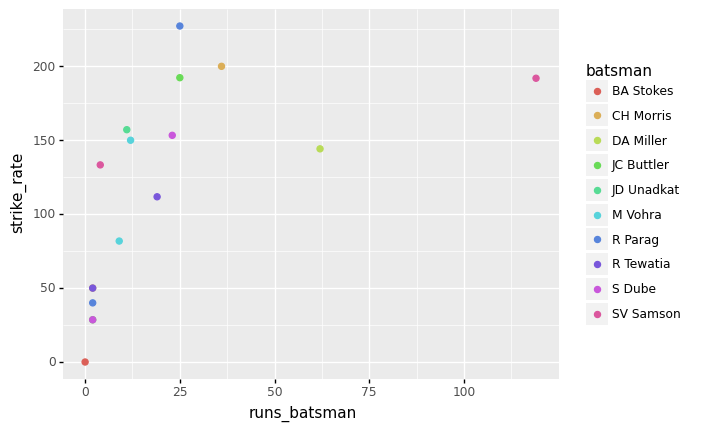

<ggplot: (8782250027656)>

In [26]:
x = current_season.groupby(['key_id','team','batsman']).agg({'runs_batsman':'sum'}).reset_index()
x['balls'] = current_season[(current_season.extras_type != 'wides') & (current_season.extras_type != 'noballs')].groupby(['key_id','team','batsman']).agg({'runs_batsman':'count'}).reset_index()['runs_batsman']
x['strike_rate'] = x['runs_batsman'] / x['balls'] * 100
x['strike_rate'] = np.round(x['strike_rate'],2)
y = x.sort_values(by = ['strike_rate','runs_batsman'], ascending = False).reset_index(drop = True)
y = y[y.team == 'Rajasthan Royals']
# y
ggplot(y) + geom_point(aes(x = 'runs_batsman',y = 'strike_rate',color = 'batsman'),size = 2)

In [27]:
x = current_season[current_season.wicket_kind != 'run out'].groupby(['key_id','innings_no','bowler']).agg({'wicket_kind':'count','ball':'count','runs_total':'sum'}).sort_values(by = 'wicket_kind',ascending = False).reset_index()
x[x.wicket_kind > 0]

,key_id,innings_no,bowler,wicket_kind,ball,runs_total
0,ipl0817,1,HV Patel,5,24,26
1,ipl0821,1,AD Russell,5,13,15
2,ipl0821,2,RD Chahar,4,24,31
3,ipl0823,2,Avesh Khan,3,24,33
4,ipl0822,2,Shahbaz Ahmed,3,12,7
5,ipl0820,2,Arshdeep Singh,3,24,35
6,ipl0823,1,JD Unadkat,3,24,15
7,ipl0820,1,C Sakariya,3,25,31
8,ipl0822,1,JO Holder,3,28,30
9,ipl0818,2,SN Thakur,2,24,53


In [15]:
x = innings_df[innings_df.wicket_kind != 'run out'].groupby(['key_id','innings_no','bowler']).agg({'wicket_kind':'count','ball':'count','runs_total':'sum'}).sort_values(by = 'wicket_kind',ascending = False).reset_index()
x[x.wicket_kind > 4].groupby('bowler').agg('sum')

,innings_no,wicket_kind,ball,runs_total
bowler,,,,
A Kumble,2,5,19,6
A Mishra,2,5,24,17
A Zampa,1,6,24,19
AD Mascarenhas,1,5,25,29
AD Russell,1,5,13,15
AJ Tye,1,5,25,18
AS Joseph,2,6,24,14
AS Rajpoot,1,5,24,15
B Kumar,2,5,25,20


In [75]:
current_season = chintu[(chintu.team == 'Delhi Capitals')]
x = current_season[(current_season.ball < 6) & (current_season.innings_no <= 2)].groupby(['key_id','innings_no','team']).agg({'wicket_kind':'count','runs_total':'sum'}).sort_values(by = ['wicket_kind','runs_total','key_id'], ascending = False)
winner = list(x[x.wicket_kind >=3].reset_index()['key_id'])
outcome_df = pd.read_csv('./ipl_data/outcome_df.csv')
bool_series = outcome_df.key_id.isin(winner)
outcome_df[bool_series]

,key_id,by_type,by_margin,eliminator,method,result,winner
12,ipl0013,wickets,4.0,NaN,NaN,NaN,Kings XI Punjab
34,ipl0035,runs,23.0,NaN,NaN,NaN,Kolkata Knight Riders
55,ipl0056,runs,105.0,NaN,NaN,NaN,Rajasthan Royals
73,ipl0074,wickets,5.0,NaN,NaN,NaN,Rajasthan Royals
107,ipl0108,wickets,7.0,NaN,NaN,NaN,Royal Challengers Bangalore
140,ipl0141,runs,40.0,NaN,NaN,NaN,Delhi Daredevils
142,ipl0143,runs,67.0,NaN,NaN,NaN,Delhi Daredevils
159,ipl0160,wickets,7.0,NaN,NaN,NaN,Kings XI Punjab
164,ipl0165,wickets,6.0,NaN,NaN,NaN,Delhi Daredevils
168,ipl0169,runs,11.0,NaN,NaN,NaN,Deccan Chargers


In [43]:
current_season[(current_season.ball > 6) & (current_season.ball < 16)].groupby(['key_id','team']).agg({'runs_total':'sum','wicket_kind':'count'})

runs_total  wicket_kind
key_id  team                                                
ipl0817 Mumbai Indians                       94            3
        Royal Challengers Bangalore          75            3
ipl0818 Chennai Super Kings                 110            4
        Delhi Capitals                       93            1
ipl0819 Kolkata Knight Riders               102            2
        Sunrisers Hyderabad                  96            2
ipl0820 Punjab Kings                        126            1
        Rajasthan Royals                    115            2
ipl0821 Kolkata Knight Riders                78            5
        Mumbai Indians                       77            3
ipl0822 Royal Challengers Bangalore          59            4
        Sunrisers Hyderabad                  65            1
ipl0823 Delhi Capitals                       71            3
        Rajasthan Royals                     79            4
ipl0824 Chennai Super Kings                  75            3
        Punjab Kings                         55            2
ipl0825 Mumbai Indians                       54            3
        Sunrisers Hyderabad                  63            5
ipl0826 Kolkata Knight Riders                69            3
        Royal Challengers Bangalore         100            1

In [ ]:
#enclose the below in a function to get matches for all formats

#type of cricket info required to extract

#The Pledge
#Take something like IPL, ODIs, etc.
type_cric = 't20s'

#The Turn
#You do something extraordinary out of it like get zip files out of the word
r = requests.get(data_url[type_cric][0])

with open('./'+ type_cric + '.zip','wb') as zip:
    zip.write(r.content)

with ZipFile('./'+ type_cric + '.zip', 'r') as zipObj:
    listOfFileNames = zipObj.namelist()

    for fileName in listOfFileNames:
        if fileName.endswith('.yaml'):
            zipObj.extract(fileName, './' + type_cric + '_files')
        if fileName.endswith('.txt'):
            zipObj.extract(fileName, './')

files_list = list()

with open('./README.txt', 'r') as readme:
    for line in readme:
        if line[0] == '2':
            readme_list = line.split('-')
            readme_list = [x.strip(' ') for x in readme_list]
            readme_list = [x.strip('\n') for x in readme_list]
            files_list.append(str(readme_list[6]))

print(len(files_list))

#The Prestige
#Change the name of the files (their apperance in this case) to something meaningful
count = 1
for i in range(len(files_list) - 1, -1, -1):
    # print(files_list[i])
    # code to assign matchid filename to the yaml files
    for filename in enumerate(os.listdir('./' + type_cric + '_files')):
        new_name = filename[1][:-5]
        if new_name == files_list[i]:
            dst = type_cric + str(format(count, '04d')) + ".yaml"
            src = './' + type_cric + '_files/' + filename[1]
            dst = './' + type_cric + '_files/' + dst

            # rename() function will
            # rename all the files
            os.rename(src, dst)
    count += 1

for i in range(1, len(files_list)+1):
    path = './' + type_cric + '_files/' + type_cric + str(format(i,'04d')) + '.yaml'
    
    with open(path) as f:
        cric_dict = yaml.load(f)
    temp_info = cric_dict['info']
    if 'bowl_out' in temp_info.keys():
        print(i)
        for x in temp_info['bowl_out']:
            print(x)
        break

1469
5
{'bowler': 'NJ Astle', 'outcome': 'miss'}
{'bowler': 'NJ Astle', 'outcome': 'miss'}
{'bowler': 'DR Smith', 'outcome': 'miss'}
{'bowler': 'DR Smith', 'outcome': 'miss'}
{'bowler': 'JS Patel', 'outcome': 'miss'}
{'bowler': 'JS Patel', 'outcome': 'miss'}
{'bowler': 'CH Gayle', 'outcome': 'miss'}
{'bowler': 'CH Gayle', 'outcome': 'miss'}
{'bowler': 'CL Cairns', 'outcome': 'miss'}
{'bowler': 'CL Cairns', 'outcome': 'miss'}
{'bowler': 'JE Taylor', 'outcome': 'miss'}
{'bowler': 'JE Taylor', 'outcome': 'miss'}
{'bowler': 'SE Bond', 'outcome': 'hit'}
{'bowler': 'SE Bond', 'outcome': 'hit'}
{'bowler': 'IDR Bradshaw', 'outcome': 'miss'}
{'bowler': 'IDR Bradshaw', 'outcome': 'miss'}
{'bowler': 'SB Styris', 'outcome': 'hit'}


In [11]:
toss_df['winner'] = toss_df.winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_df['winner'] = toss_df.winner.replace('Delhi Daredevils','Delhi Capitals')
toss_df['winner'] = toss_df.winner.replace('Pune Warriors','Pune Warriors India')
toss_df['winner'] = toss_df.winner.replace('Kings XI Punjab','Punjab Kings')

team_df['teams'] = team_df.teams.replace('Rising Pune Supergiant','Rising Pune Supergiants')
team_df['teams'] = team_df.teams.replace('Delhi Daredevils','Delhi Capitals')
team_df['teams'] = team_df.teams.replace('Pune Warriors','Pune Warriors India')
team_df['teams'] = team_df.teams.replace('Kings XI Punjab','Punjab Kings')

outcome_df['winner'] = outcome_df.winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
outcome_df['winner'] = outcome_df.winner.replace('Delhi Daredevils','Delhi Capitals')
outcome_df['winner'] = outcome_df.winner.replace('Pune Warriors','Pune Warriors India')
outcome_df['winner'] = outcome_df.winner.replace('Kings XI Punjab','Punjab Kings')



In [25]:
toss_df.groupby(['winner' ,'decision']).count()

key_id
winner                      decision        
Chennai Super Kings         bat           51
                            field         46
Deccan Chargers             bat           24
                            field         19
Delhi Capitals              bat           36
                            field         64
Gujarat Lions               bat            1
                            field         14
Kochi Tuskers Kerala        bat            3
                            field          5
Kolkata Knight Riders       bat           34
                            field         64
Mumbai Indians              bat           48
                            field         58
Pune Warriors India         bat           11
                            field          9
Punjab Kings                bat           27
                            field         58
Rajasthan Royals            bat           34
                            field         53
Rising Pune Supergiants     bat            3
                            field         10
Royal Challengers Bangalore bat           24
                            field         64
Sunrisers Hyderabad         bat           24
                            field         33

In [26]:
timepass = pd.merge(umpires_df,outcome_df, how = 'left')
timepass.head()

timepass.groupby(['winner','umpires']).count().sort_values(by = 'key_id', ascending = False)

key_id  by_type  ...  method  result
winner                      umpires                           ...                
Mumbai Indians              S Ravi               20       20  ...       0       0
                            HDPK Dharmasena      18       18  ...       0       0
Kolkata Knight Riders       AK Chaudhary         18       18  ...       1       0
Delhi Capitals              S Ravi               18       18  ...       0       0
Royal Challengers Bangalore S Ravi               17       17  ...       0       0
...                                             ...      ...  ...     ...     ...
Pune Warriors India         Aleem Dar             1        1  ...       0       0
                            BNJ Oxenford          1        1  ...       0       0
                            BR Doctrove           1        1  ...       0       0
                            M Erasmus             1        1  ...       0       0
Sunrisers Hyderabad         YC Barde              1        1  ...       0       0

[426 rows x 6 columns]

### **Rough Work**

In [ ]:
toss_path = './' + type_cric + '_data/toss_df.csv'
toss_df.to_csv(toss_path,index=False)

,key_id,toss_winner,toss_decision
0,ipl0001,Royal Challengers Bangalore,field
1,ipl0002,Rajasthan Royals,bat
2,ipl0003,Chennai Super Kings,bat
3,ipl0004,Deccan Chargers,bat
4,ipl0005,Mumbai Indians,bat


In [ ]:
toss_df['toss_winner'] = toss_df.toss_winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_df['toss_winner'] = toss_df.toss_winner.replace('Delhi Daredevils','Delhi Capitals')
toss_df['toss_winner'] = toss_df.toss_winner.replace('Pune Warriors','Pune Warriors India')
toss_df.groupby('toss_winner').count()

,key_id,toss_decision
toss_winner,,
Chennai Super Kings,97,97
Deccan Chargers,43,43
Delhi Capitals,100,100
Gujarat Lions,15,15
Kings XI Punjab,85,85
Kochi Tuskers Kerala,8,8
Kolkata Knight Riders,98,98
Mumbai Indians,106,106
Pune Warriors India,20,20


In [ ]:
# toss_df['toss_winner'] = toss_df.toss_winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_df.groupby('toss_winner').count()

,key_id,toss_decision
toss_winner,,
Chennai Super Kings,97,97
Deccan Chargers,43,43
Delhi Capitals,100,100
Gujarat Lions,15,15
Kings XI Punjab,85,85
Kochi Tuskers Kerala,8,8
Kolkata Knight Riders,98,98
Mumbai Indians,106,106
Pune Warriors India,20,20


In [ ]:

if 'Unnamed: 0' in list(umpires_df.columns):
    umpires_df = umpires_df.drop(columns='Unnamed: 0')


for i in range(1,len(files_list)+1):
    path = './' + type_cric + '_files/' + type_cric  + str(format(i,'04d')) + '.yaml'
    with open(path) as f:
        cric_dict = yaml.load(f)
        umpire_list = cric_dict['info']['umpires']
    key = type_cric + str(format(i,'04d'))
    for umpire in umpire_list:
        temp_dict1 = {'key_id':key,'umpires':umpire}
        umpires_df = umpires_df.append(temp_dict1,ignore_index=True)

umpires_df.head()


,key_id,umpires
0,ipl0001,Asad Rauf
1,ipl0001,RE Koertzen
2,ipl0002,Aleem Dar
3,ipl0002,GA Pratapkumar
4,ipl0003,MR Benson


#### **Temp idea**

In [ ]:
leagues = ['ipl','bbl','wbbl','psl','cpl','ntb','ssm']


-14.423622047244093

In [ ]:
for i in range(1,len(files_list)+1):
    path = './'+ type_cric+ '_files'

### **Magic time**

In [ ]:
#The Pledge
type_cric = 'tests'

#The Turn
r = requests.get(data_url[type_cric][0])

with open('./'+ type_cric + '.zip','wb') as zip:
    zip.write(r.content)

with ZipFile('./'+ type_cric + '.zip', 'r') as zipObj:
    listOfFileNames = zipObj.namelist()

    for fileName in listOfFileNames:
        if fileName.endswith('.yaml'):
            zipObj.extract(fileName, './' + type_cric + '_files')
        if fileName.endswith('.txt'):
            zipObj.extract(fileName, './')

files_list = list()

with open('./README.txt', 'r') as readme:
    for line in readme:
        if line[0] == '2':
            readme_list = line.split('-')
            readme_list = [x.strip(' ') for x in readme_list]
            readme_list = [x.strip('\n') for x in readme_list]
            files_list.append(str(readme_list[6]))

print(len(files_list))

#The Prestige
count = 1
for i in range(len(files_list) - 1, -1, -1):
    # print(files_list[i])
    # code to assign matchid filename to the yaml files
    for filename in enumerate(os.listdir('./' + type_cric + '_files')):
        new_name = filename[1][:-5]
        if new_name == files_list[i]:
            dst = "m" + str(format(count, '04d')) + ".yaml"
            src = './' + type_cric + '_files/' + filename[1]
            dst = './' + type_cric + '_files/' + dst

            # rename() function will
            # rename all the files
            os.rename(src, dst)
    count += 1

816


## **Documentation**

- [x] Team df
- [x] Umpire df
- [x] Outcome df
- [x] Info df
- [x] Toss df
- [x] Meta df


### **Dataframes**
* **Meta**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| Version | float | lorem |
| Created | date | lorem |
| Revision | float | lorem |

--------------------
* **Info**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| City | string | name of the city where the match is played |
| Date | date | date of the match |
| Player of Match | string | name of the player of the match |
| venue | string | name of the stadium where the match is held |
| Neutral Venue | boolean | if the match is played at a neutral venue or not |

* **Umpires**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| Umpires | string | Names of the umpires for the match |

* **Outcome**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| Winner | string | name of the team who won the match |
| Result Type | string | how the winning team won - runs or wickets |
| Result Margin | int | number by which the team won |
| Eliminator | boolean | if the match was an eliminator match or not |

* **Teams**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| Teams | string | Names of the teams participating in the match |

* **Toss**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |
| Toss winner | string | Name of the team winning the toss for the match |
| Toss decision | string | Choice of team winning the toss |

--------------------
* **Innings**

| Name | Type | Desc |
| --- | --- | --- |
| Key_ID | string | A common ID to relate info across dataframes |